In [139]:
import re

def load_secrets_from_js(file_path):
    secrets = {}
    with open(file_path, 'r') as file:
        content = file.read()
        url_match = re.search(r"SUPABASE_URL\s*=\s*'([^']*)'", content)
        key_match = re.search(r"SUPABASE_SERVICE_KEY\s*=\s*'([^']*)'", content)
        if url_match:
            secrets['SUPABASE_URL'] = url_match.group(1)
        if key_match:
            secrets['SUPABASE_KEY'] = key_match.group(1)
    return secrets

In [140]:
# Cell 1: Imports and Setup
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from supabase import create_client, Client
from matplotlib.colors import LinearSegmentedColormap
from colorsys import hls_to_rgb

# Load secrets from the JavaScript file
secrets = load_secrets_from_js('../src/secretkeys.js')

# Initialize Supabase client
url: str = secrets.get("SUPABASE_URL")
key: str = secrets.get("SUPABASE_KEY")

if not url or not key:
    raise ValueError("SUPABASE_URL or SUPABASE_KEY not found in secretkeys.js")

supabase: Client = create_client(url, key)

print("Supabase client initialized successfully")
print(f"Using key: {key[:10]}...") # This will print the first 10 characters of the key


Supabase client initialized successfully
Using key: eyJhbGciOi...


In [141]:
# Cell 2: Fetch and Process Data
# Fetch data from Supabase
try:
    response = supabase.rpc('select_color_test_results').execute()
    print(f"Data fetched successfully. Number of records: {len(response.data)}")
    
    if not response.data:
        print("No data in the table. Inserting test data...")
        
        # Insert test data using RPC
        test_data = {
            "p_anonymous_id": "test_user_1",
            "p_user_agent": "Test User Agent",
            "p_screen_width": 1920,
            "p_screen_height": 1080,
            "p_color_depth": 24,
            "p_pixel_ratio": 1.0,
            "p_responses": [180, 200, 220],
            "p_final_hues": [180, 200, 220, 240, 260, 280],
            "p_version": "1.0",
            "p_test_duration": 60.5
        }
        
        insert_response = supabase.rpc('insert_color_test_result', test_data).execute()
        print("Test data inserted successfully.")
        
        # Fetch data again
        response = supabase.rpc('select_color_test_results').execute()
        print(f"Data fetched after insertion. Number of records: {len(response.data)}")
    else:
        print("Existing data found in the table.")
    
    # Convert to DataFrame
    df = pd.DataFrame(response.data)
    
    print("\nDataFrame Info:")
    print(df.info())
    
    print("\nFirst few rows of the DataFrame:")
    print(df.head())
    
    print("\nColumn names:")
    print(df.columns.tolist())
    
    print("\nSample of data types:")
    print(df.dtypes)

except Exception as e:
    print(f"Error: {str(e)}")
    df = pd.DataFrame()  # Create an empty DataFrame in case of error

# Additional check
if df.empty:
    print("\nWarning: DataFrame is empty after fetching data.")
else:
    print(f"\nDataFrame contains {len(df)} rows.")

Data fetched successfully. Number of records: 3
Existing data found in the table.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anonymous_id     3 non-null      object 
 1   user_agent       3 non-null      object 
 2   screen_width     2 non-null      float64
 3   screen_height    2 non-null      float64
 4   color_depth      2 non-null      float64
 5   pixel_ratio      2 non-null      float64
 6   timestamp        3 non-null      object 
 7   local_timestamp  2 non-null      object 
 8   responses        3 non-null      object 
 9   final_hues       3 non-null      object 
 10  version          2 non-null      object 
 11  test_duration    2 non-null      float64
 12  log_data         2 non-null      object 
 13  created_at       3 non-null      object 
 14  id               3 non-null      object 
dtypes: float64(5)

In [142]:
# # Convert to DataFrame and filter for the latest version
# df = pd.DataFrame(response.data)
# latest_version = df['version'].max()
# df = df.query(f"version == '{latest_version}'")

# Convert to DataFrame
df = pd.DataFrame(response.data)

# Display information about the DataFrame
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())

# Display the column names
print("\nColumns in the DataFrame:")
print(df.columns.tolist())

# Define color pairs
COLOR_PAIRS = [
    {"color1": "red", "color2": "orange", "hueRange": [0, 30]},
    {"color1": "orange", "color2": "yellow", "hueRange": [30, 60]},
    {"color1": "yellow", "color2": "green", "hueRange": [60, 120]},
    {"color1": "green", "color2": "blue", "hueRange": [120, 240]},
    {"color1": "blue", "color2": "purple", "hueRange": [240, 300]},
    {"color1": "purple", "color2": "red", "hueRange": [300, 360]}
]

# Display the first few rows of the processed DataFrame
print(df.head())

# Display information about the processed DataFrame
print(df.info())

# import matplotlib.pyplot as plt

# counts, bins, _ = plt.hist(df.final_hue, bins=69)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anonymous_id     3 non-null      object 
 1   user_agent       3 non-null      object 
 2   screen_width     2 non-null      float64
 3   screen_height    2 non-null      float64
 4   color_depth      2 non-null      float64
 5   pixel_ratio      2 non-null      float64
 6   timestamp        3 non-null      object 
 7   local_timestamp  2 non-null      object 
 8   responses        3 non-null      object 
 9   final_hues       3 non-null      object 
 10  version          2 non-null      object 
 11  test_duration    2 non-null      float64
 12  log_data         2 non-null      object 
 13  created_at       3 non-null      object 
 14  id               3 non-null      object 
dtypes: float64(5), object(10)
memory usage: 488.0+ bytes
None
             anonymous_id                             

In [143]:
def calculate_boundaries(df, color_pair):
    index = COLOR_PAIRS.index(color_pair)
    final_hues = df['final_hues'].apply(lambda x: x[index] if isinstance(x, list) and len(x) > index else None)
    final_hues = final_hues.dropna()
    
    if len(final_hues) == 0:
        return [], [], [], []
    
    xy = final_hues.value_counts().sort_index().reset_index()
    xy.columns = ['hue', 'count']
    final_hue_raw = xy['hue'].values
    raw_count = xy['count'].values
    raw_count = raw_count / raw_count.sum()

    count = np.cumsum(raw_count)
    count = np.column_stack((np.zeros_like(count), count)).flatten()
    final_hue = np.column_stack((final_hue_raw, final_hue_raw)).flatten()

    return final_hue_raw.tolist(), raw_count.tolist(), final_hue.tolist(), count.tolist()

def show_threshold(df, color_pair, title):
    hue_start, hue_end = color_pair['hueRange']
    data = []
    for i in range(hue_start, hue_end + 1):
        data.append(hls_to_rgb(i / 360, .5, 1))

    cmap = LinearSegmentedColormap.from_list("custom", data)
    bin_position, count, x_cdf, y_cdf = calculate_boundaries(df, color_pair)

    if not bin_position:
        print(f"No valid data for {color_pair['color1']}_{color_pair['color2']}")
        return

    # Create gradient background
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    plt.figure(figsize=(6, 2))
    plt.imshow(gradient, aspect='auto', extent=[hue_start, hue_end, 0, 1], cmap=cmap)

    plt.bar(bin_position, count, color='white', alpha=1, width=2)
    plt.plot(x_cdf, y_cdf, '-', color='black')

    plt.xlim(hue_start, hue_end)
    plt.xlabel("Hue")
    plt.yticks([0, .1, .5, .9, 1], ["0%", "10%", "50%", "90%", "100%"])
    plt.box(False)
    plt.title(title)

    plt.grid(True, axis='y', color='black', linestyle='-.', linewidth=0.5)
    plt.show()

    return bin_position.tolist(), count.tolist(), x_cdf.tolist(), y_cdf.tolist()

In [144]:
# Cell 5: Perform Analysis and Update keys.js
import re
import ast

def read_existing_color_data(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    match = re.search(r'export const COLOR_DATA = ({[\s\S]*?});', content)
    if match:
        data_str = match.group(1)
        # Replace JavaScript object syntax with Python dict syntax
        data_str = data_str.replace('{', '{\n').replace('}', '\n}').replace(':', ': ')
        data_str = re.sub(r'(\w+):', r"'\1':", data_str)
        try:
            return eval(data_str)
        except:
            print("Warning: Could not parse existing COLOR_DATA. Starting with empty data.")
    return {}

def is_new_data_better(existing, new):
    # This is a simple comparison. You may want to adjust this based on your specific criteria.
    return len(new['BIN_POSITION']) > len(existing['BIN_POSITION'])

def update_keys_js(file_path, all_boundaries):
    # Read the entire content of keys.js
    with open(file_path, 'r') as f:
        keys_content = f.read()

    # Prepare the new COLOR_DATA content
    new_color_data = "export const COLOR_DATA = {\n"
    for color_pair, data in all_boundaries.items():
        new_color_data += f"  {color_pair}: {{\n"
        for key, value in data.items():
            new_color_data += f"    {key}: {value},\n"
        new_color_data += "  },\n"
    new_color_data += "};\n"

    # Replace the existing COLOR_DATA in the file content
    updated_content = re.sub(
        r'export const COLOR_DATA = {[\s\S]*?};',
        new_color_data.strip(),
        keys_content
    )

    # Write the updated content back to keys.js
    with open(file_path, 'w') as f:
        f.write(updated_content)

    print("keys.js has been updated with the best available data.")

if not df.empty:
    all_boundaries = {}
    existing_data = read_existing_color_data('../src/keys.js')

    for pair in COLOR_PAIRS:
        pair_name = f"{pair['color1']}_{pair['color2']}"
        title = f"{pair['color1'].capitalize()}-{pair['color2'].capitalize()} Threshold"
        try:
            bin_position, count, x_cdf, y_cdf = calculate_boundaries(df, pair)
            
            new_data = {
                "BIN_POSITION": bin_position,
                "BIN_COUNT": count,
                "X_CDF": x_cdf,
                "Y_CDF": y_cdf
            }
            
            if bin_position:
                all_boundaries[pair_name] = new_data
                print(f"Adding/Updating data for {pair_name}")
            elif pair_name in existing_data:
                all_boundaries[pair_name] = existing_data[pair_name]
                print(f"Keeping existing data for {pair_name}")
            else:
                all_boundaries[pair_name] = {
                    "BIN_POSITION": [],
                    "BIN_COUNT": [],
                    "X_CDF": [],
                    "Y_CDF": []
                }
                print(f"Adding empty data for {pair_name}")
        except Exception as e:
            print(f"Error processing {pair_name}: {str(e)}")
            if pair_name in existing_data:
                all_boundaries[pair_name] = existing_data[pair_name]
                print(f"Keeping existing data for {pair_name} due to error")
            else:
                all_boundaries[pair_name] = {
                    "BIN_POSITION": [],
                    "BIN_COUNT": [],
                    "X_CDF": [],
                    "Y_CDF": []
                }
                print(f"Adding empty data for {pair_name} due to error")

    update_keys_js('../src/keys.js', all_boundaries)
else:
    print("No data available for analysis. Please check your database and connection.")

Adding/Updating data for red_orange
Adding/Updating data for orange_yellow
Adding/Updating data for yellow_green
Adding/Updating data for green_blue
Adding/Updating data for blue_purple
Adding/Updating data for purple_red
keys.js has been updated with the best available data.


Device Type Distribution:
device_type
Other    3
Name: count, dtype: int64

Device Type Percentage:
device_type
Other    100.0
Name: count, dtype: float64


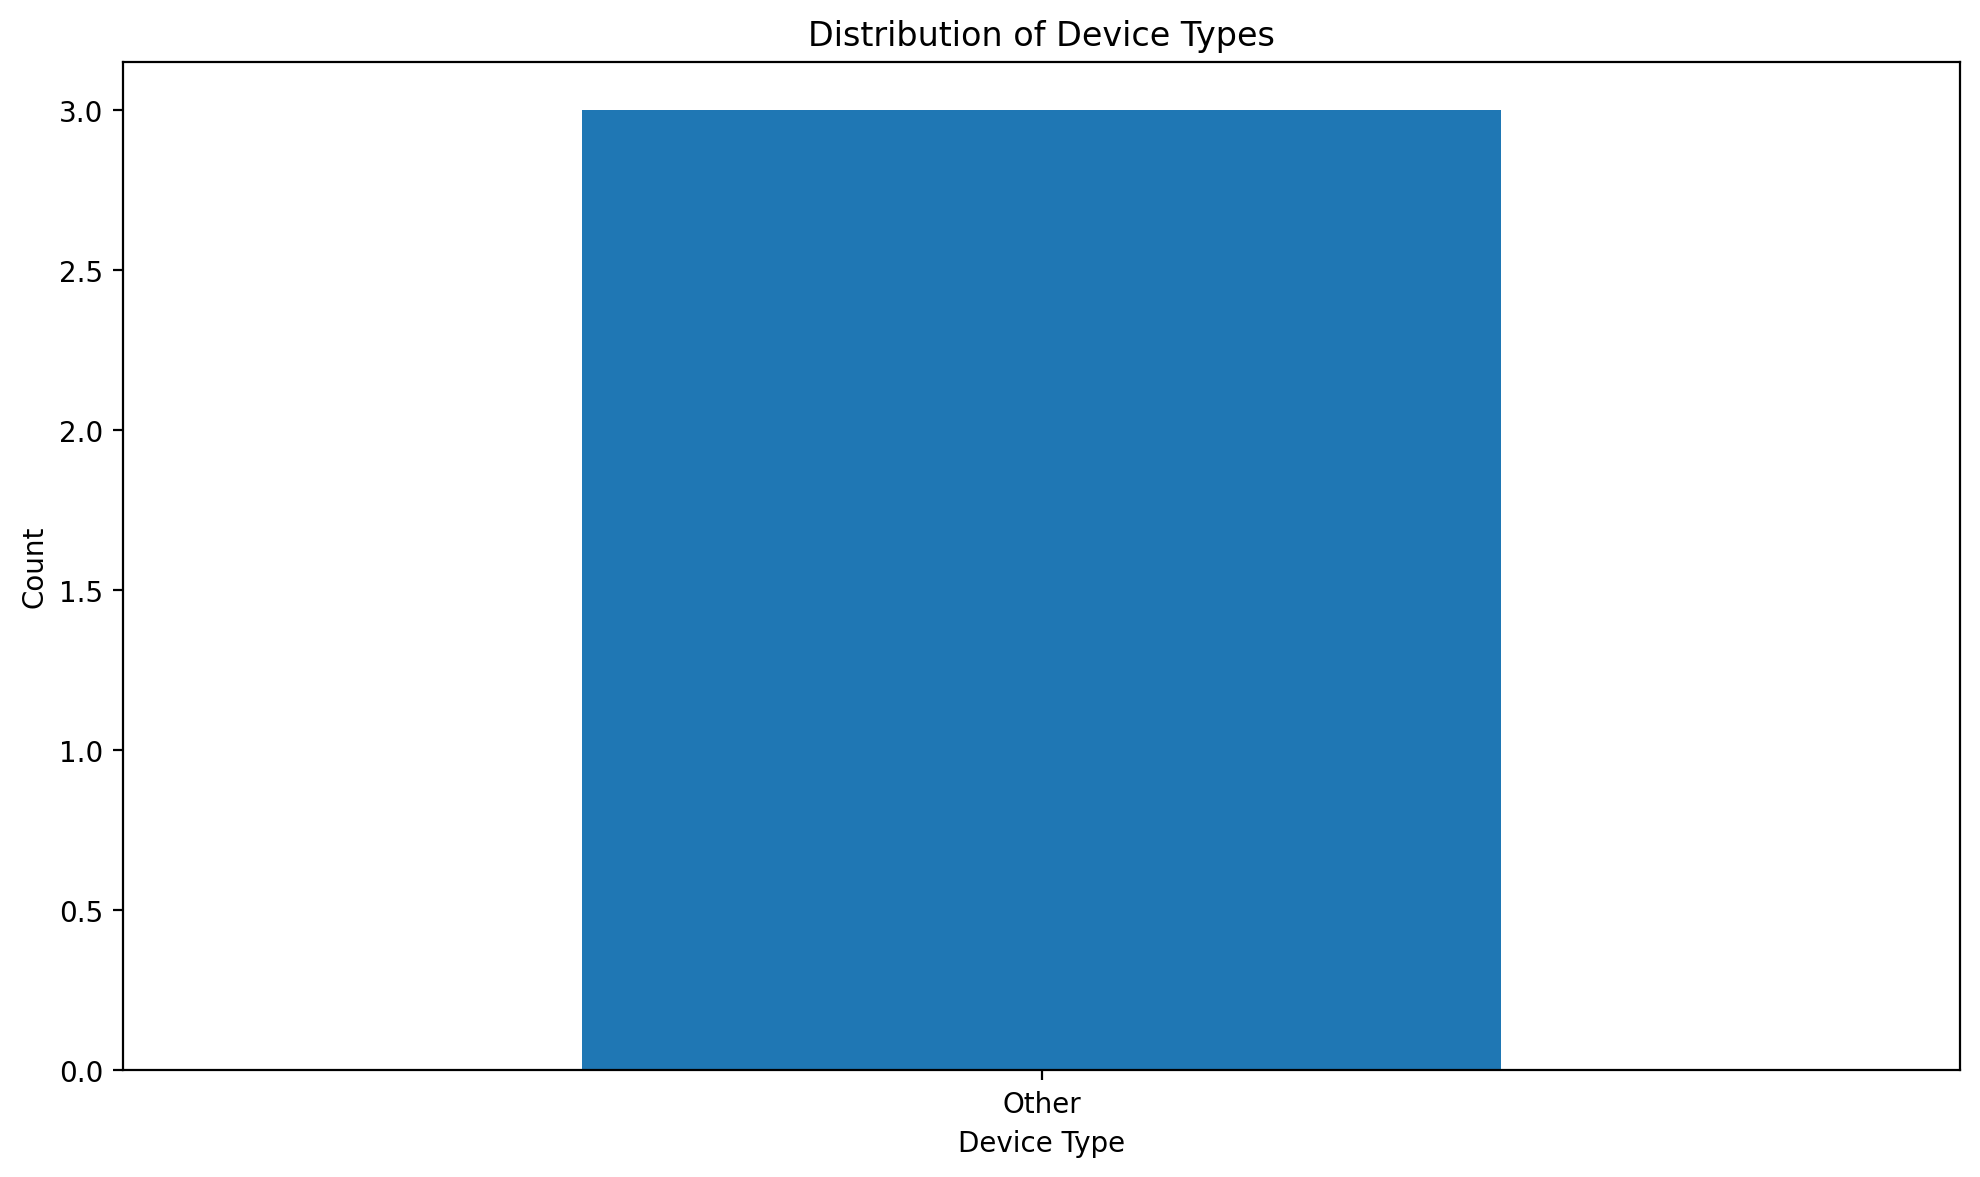

In [145]:
# Create a coarse classifier in terms of iPhone vs. Android vs. other
# Create a coarse classifier for iPhone vs. Android vs. other
def classify_device(user_agent):
    user_agent = user_agent.lower()
    if 'iphone' in user_agent:
        return 'iPhone'
    elif 'android' in user_agent:
        return 'Android'
    else:
        return 'Other'

# Apply the classifier to the user_agent column
df['device_type'] = df['user_agent'].apply(classify_device)

# Display the distribution of device types
device_distribution = df['device_type'].value_counts()
print("Device Type Distribution:")
print(device_distribution)

# Calculate the percentage distribution
device_percentage = device_distribution / len(df) * 100
print("\nDevice Type Percentage:")
print(device_percentage)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
device_distribution.plot(kind='bar')
plt.title('Distribution of Device Types')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [146]:
# Show thresholds for Android and iPhone
for device in ['Android', 'iPhone']:
    for pair in COLOR_PAIRS:
        pair_name = f"{pair['color1']}_{pair['color2']}"
        title = f"{device} {pair['color1'].capitalize()}-{pair['color2'].capitalize()} Threshold"
        show_threshold(df[df['device_type'] == device], pair, title)

No valid data for red_orange
No valid data for orange_yellow
No valid data for yellow_green
No valid data for green_blue
No valid data for blue_purple
No valid data for purple_red
No valid data for red_orange
No valid data for orange_yellow
No valid data for yellow_green
No valid data for green_blue
No valid data for blue_purple
No valid data for purple_red
